In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [69]:
start_url = 'https://www.imerisia.gr/oikonomia?_wrapper_format=html&page='

In [70]:
response = requests.get(start_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [71]:
doc.find('div', {'class': 'square-teasers'}).find_all('article')

[<article class="square-teaser">
 <a data-tb-region-item="" href="/oikonomia/73699_energeia-mikri-anodos-stis-times-ton-kaysimon-se-katheti-ptosi-fysiko-aerio-kai">
 <div class="default-cat-date">
 <span>ΟΙΚΟΝΟΜΙΑ</span>
 <time datetime="2023-05-29T20:00:00+03:00">29.05.23 <span>20:00</span></time>
 </div>
 <h4>
 Ενέργεια: Μικρή άνοδος στις τιμές των καυσίμων - Σε κάθετη πτώση φυσικό αέριο και ρεύμα
 </h4>
 <figure>
 <img alt="" class="media__image media__element b-lazy" data-src="/sites/default/files/styles/square_medium/public/2022-05/%CF%86%CF%85%CF%83%CE%B9%CE%BA%CF%8C%20%CE%B1%CE%AD%CF%81%CE%B9%CE%BF%20%CE%B5%CF%85%CF%81%CF%89%CF%80%CE%B7.jpg?itok=yzPPXMkz" height="114" loading="lazy" src="data:image/svg+xml;charset=utf-8,%3Csvg xmlns%3D'http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg' viewBox%3D'0 0 114 114'%2F%3E" typeof="foaf:Image" width="114"/>
 </figure>
 <div class="default-summary">Παραμένει σε καθοδική πορεία η τιμή του φυσικού αερίου, παρασύροντας στην πορεία αυτή και τις...</div>


In [72]:
len(doc.find('div', {'class': 'square-teasers'}).find_all('article'))

12

In [73]:
doc.find('div', {'class': 'square-teasers'}).find_all('article')[0]

<article class="square-teaser">
<a data-tb-region-item="" href="/oikonomia/73699_energeia-mikri-anodos-stis-times-ton-kaysimon-se-katheti-ptosi-fysiko-aerio-kai">
<div class="default-cat-date">
<span>ΟΙΚΟΝΟΜΙΑ</span>
<time datetime="2023-05-29T20:00:00+03:00">29.05.23 <span>20:00</span></time>
</div>
<h4>
Ενέργεια: Μικρή άνοδος στις τιμές των καυσίμων - Σε κάθετη πτώση φυσικό αέριο και ρεύμα
</h4>
<figure>
<img alt="" class="media__image media__element b-lazy" data-src="/sites/default/files/styles/square_medium/public/2022-05/%CF%86%CF%85%CF%83%CE%B9%CE%BA%CF%8C%20%CE%B1%CE%AD%CF%81%CE%B9%CE%BF%20%CE%B5%CF%85%CF%81%CF%89%CF%80%CE%B7.jpg?itok=yzPPXMkz" height="114" loading="lazy" src="data:image/svg+xml;charset=utf-8,%3Csvg xmlns%3D'http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg' viewBox%3D'0 0 114 114'%2F%3E" typeof="foaf:Image" width="114"/>
</figure>
<div class="default-summary">Παραμένει σε καθοδική πορεία η τιμή του φυσικού αερίου, παρασύροντας στην πορεία αυτή και τις...</div>
</a>
</articl

In [74]:
link = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('a')['href']
link

'/oikonomia/73699_energeia-mikri-anodos-stis-times-ton-kaysimon-se-katheti-ptosi-fysiko-aerio-kai'

In [75]:
main_url = 'https://www.imerisia.gr/'
link = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('a')['href']
article_link = main_url + link
article_link

'https://www.imerisia.gr//oikonomia/73699_energeia-mikri-anodos-stis-times-ton-kaysimon-se-katheti-ptosi-fysiko-aerio-kai'

In [76]:
title = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('a').text
title

'\n\nΟΙΚΟΝΟΜΙΑ\n29.05.23 20:00\n\n\nΕνέργεια: Μικρή άνοδος στις τιμές των καυσίμων - Σε κάθετη πτώση φυσικό αέριο και ρεύμα\n\n\n\n\nΠαραμένει σε καθοδική πορεία η τιμή του φυσικού αερίου, παρασύροντας στην πορεία αυτή και τις...\n'

In [77]:
time = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('time').text
time

'29.05.23 20:00'

In [78]:
section = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('span').text
section

'ΟΙΚΟΝΟΜΙΑ'

In [79]:
summary = doc.find('div', {'class': 'square-teasers'}).find_all('article')[0].find('div', {'class': 'default-summary'}).text
summary

'Παραμένει σε καθοδική πορεία η τιμή του φυσικού αερίου, παρασύροντας στην πορεία αυτή και τις...'

In [80]:
main_url = 'https://www.imerisia.gr/'
stories_list = []
stories = doc.find('div', {'class': 'square-teasers'}).find_all('article')
for story in stories:
    story_dict = {}
    try: 
      link = story.find('a')['href'] 
      if link.startswith("http"):
        story_dict['url'] = link
      else:
        story_dict['url'] = main_url + link
    except: 
      story_dict['url'] = ''
      pass
    try:
      title = story.find('a', {'class': 'full-link'}).text
      story_dict['title'] = title
    except:
      story_dict['title'] = ''
      pass
    try:
      time = story.find('time').text
      story_dict['time'] = time
    except:
      story_dict['time'] = ''
      pass
    try:
      section = story.find('span').text
      story_dict['section'] = section
    except:
      story_dict['section'] = ''
      pass
    try:
      summary = story.find('div', {'class': 'default-summary'}).text
      story_dict['summary'] = summary
    except:
      story_dict['summary'] = ''
      pass
    stories_list.append(story_dict)
imerisia_df = pd.DataFrame(stories_list)

In [81]:
imerisia_df

,url,title,time,section,summary
0,https://www.imerisia.gr//oikonomia/73699_energ...,,29.05.23 20:00,ΟΙΚΟΝΟΜΙΑ,Παραμένει σε καθοδική πορεία η τιμή του φυσικο...
1,https://www.imerisia.gr//oikonomia/trapezes/73...,,29.05.23 18:33,ΤΡΑΠΕΖΕΣ,Πρόσκληση στους επιχειρηματίες να μην εφησυχάσ...
2,https://www.imerisia.gr//oikonomia/73668_iliak...,,29.05.23 12:52,ΟΙΚΟΝΟΜΙΑ,Με την ολοκλήρωση των αιτήσεων και την απενεργ...
3,https://www.imerisia.gr//oikonomia/73672_hondr...,,29.05.23 12:24,ΟΙΚΟΝΟΜΙΑ,Τα στοιχεία της ΕΛΣΤΑΤ
4,https://www.imerisia.gr//oikonomia/73669_bamba...,,29.05.23 11:34,ΟΙΚΟΝΟΜΙΑ,Αυξημένα είναι τα ποσά των ελάχιστων αποδόσεων...
5,https://www.imerisia.gr//oikonomia/trapezes/73...,,29.05.23 11:17,ΤΡΑΠΕΖΕΣ,Το κτήριο αναμένεται να έχει περίπου 100 θέσει...
6,https://www.imerisia.gr//oikonomia/73638_hreos...,,29.05.23 08:00,ΟΙΚΟΝΟΜΙΑ,Οι κινήσεις του ΟΔΔΗΧ συνδέονται με την ανάκτη...
7,https://www.imerisia.gr//oikonomia/73645_efka-...,,29.05.23 07:37,ΟΙΚΟΝΟΜΙΑ,Συνολικά εκτιμάται ότι θα καταβληθούν περί τα ...
8,https://www.imerisia.gr//oikonomia/73553_epist...,,28.05.23 09:00,ΟΙΚΟΝΟΜΙΑ,Οι επιχειρήσεις έχουν την ευκαιρία να γλιτώσου...
9,https://www.imerisia.gr//oikonomia/trapezes/73...,,27.05.23 16:00,ΤΡΑΠΕΖΕΣ,"Σύμφωνα με τα στοιχεία μέχρι τις 25 Μαΐου, για..."


In [82]:

main_url = 'https://www.imerisia.gr/'
start_url = 'https://www.imerisia.gr/oikonomia?_wrapper_format=html&page=1'
stories_list = []
for page_num in range(0, 2):
  url = start_url + str(page_num)
  response = requests.get(url)
  doc = BeautifulSoup(response.text, 'html.parser')
  stories = doc.find('div', {'class': 'square-teasers'}).find_all('article')
  for story in stories:
      story_dict = {}
      try:
        link = story.find('a')['href'] 
        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      try:
        title = story.find('a', {'class': 'full-link'}).text
        story_dict['title'] = title
      except:
        story_dict['title'] = ''
        pass
      try:
        time = story.find('time').text
        story_dict['time'] = time
      except:
        story_dict['time'] = ''
        pass
      try:
        section = story.find('span').text
        story_dict['section'] = section
      except:
        story_dict['section'] = ''
        pass
      try:
        summary = story.find('div', {'class': 'default-summary'}).text
        story_dict['summary'] = summary
      except:
        story_dict['summary'] = ''
        pass
      stories_list.append(story_dict)
imerisia_df = pd.DataFrame(stories_list)

In [83]:
import numpy as np 

In [84]:
imerisia_df.head(1)

,url,title,time,section,summary
0,https://www.imerisia.gr//oikonomia/71805_oi-kl...,,02.05.23 16:24,ΟΙΚΟΝΟΜΙΑ,Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότερ...


In [85]:
imerisia_df['text'] = imerisia_df[['title', 'summary']].agg('.'.join, axis=1)
imerisia_df.loc[0, 'text']

'.Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότερους εξαγωγικούς προορισμούς για τα ελληνικά προϊόντα...'

In [86]:
imerisia_df.dtypes

url        object
title      object
time       object
section    object
summary    object
text       object
dtype: object

In [87]:
imerisia_df.loc[0, 'time']

'02.05.23 16:24'

In [88]:
imerisia_df['date'] = pd.to_datetime(imerisia_df['time'], format='%d.%m.%y %H:%M')

In [89]:
imerisia_df.dtypes

url                object
title              object
time               object
section            object
summary            object
text               object
date       datetime64[ns]
dtype: object

In [90]:
imerisia_df.head(1)

,url,title,time,section,summary,text,date
0,https://www.imerisia.gr//oikonomia/71805_oi-kl...,,02.05.23 16:24,ΟΙΚΟΝΟΜΙΑ,Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότερ...,.Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότε...,2023-05-02 16:24:00


In [91]:
short_imerisia_df = imerisia_df[['date','text' ]] 

In [92]:
short_imerisia_df.head()

,date,text
0,2023-05-02 16:24:00,.Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότε...
1,2023-05-02 14:52:00,".Ο δομικός πληθωρισμός, ο οποίος δεν περιλαμβά..."
2,2023-05-02 14:31:00,.Ο βασικός παράγοντας που επηρέασε τη μείωση τ...
3,2023-05-02 14:05:00,.Προβλέπεται ειδικό bonus 10% για άτομα με ανα...
4,2023-05-02 14:04:00,.Η καταβολή της 2ης δόσης θα πραγματοποιηθεί σ...


In [93]:
short_imerisia_df.tail()

,date,text
19,2023-04-29 08:30:00,.Την έκπληξη επιδιώκουν στο οικονομικό επιτελε...
20,2023-04-28 23:14:00,".Συνεργασία είναι η λέξη «κλειδί», που θα ανοί..."
21,2023-04-28 21:52:00,.Oι μεγάλοι επενδυτές αναζητούν ευκαιρίες διαφ...
22,2023-04-28 21:39:00,.Η επιτακτική ανάγκη της πράσινης μετάβασης κα...
23,2023-04-28 21:13:00,".Η έρευνα συμπεραίνει ότι, σήμερα, εν μέσω τόσ..."


In [94]:
short_imerisia_df.head()

,date,text
0,2023-05-02 16:24:00,.Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότε...
1,2023-05-02 14:52:00,".Ο δομικός πληθωρισμός, ο οποίος δεν περιλαμβά..."
2,2023-05-02 14:31:00,.Ο βασικός παράγοντας που επηρέασε τη μείωση τ...
3,2023-05-02 14:05:00,.Προβλέπεται ειδικό bonus 10% για άτομα με ανα...
4,2023-05-02 14:04:00,.Η καταβολή της 2ης δόσης θα πραγματοποιηθεί σ...


In [95]:
short_imerisia_df.tail()

,date,text
19,2023-04-29 08:30:00,.Την έκπληξη επιδιώκουν στο οικονομικό επιτελε...
20,2023-04-28 23:14:00,".Συνεργασία είναι η λέξη «κλειδί», που θα ανοί..."
21,2023-04-28 21:52:00,.Oι μεγάλοι επενδυτές αναζητούν ευκαιρίες διαφ...
22,2023-04-28 21:39:00,.Η επιτακτική ανάγκη της πράσινης μετάβασης κα...
23,2023-04-28 21:13:00,".Η έρευνα συμπεραίνει ότι, σήμερα, εν μέσω τόσ..."


In [96]:
short_imerisia_df['year'] = pd.DatetimeIndex(short_imerisia_df['date']).year
short_imerisia_df['month'] = pd.DatetimeIndex(short_imerisia_df['date']).month
short_imerisia_df['day'] = pd.DatetimeIndex(short_imerisia_df['date']).day
short_imerisia_df['hour'] = pd.DatetimeIndex(short_imerisia_df['date']).hour

<ipython-input-96-9fe27435f86c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_imerisia_df['year'] = pd.DatetimeIndex(short_imerisia_df['date']).year
<ipython-input-96-9fe27435f86c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_imerisia_df['month'] = pd.DatetimeIndex(short_imerisia_df['date']).month
<ipython-input-96-9fe27435f86c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [97]:
short_imerisia_df.head()

,date,text,year,month,day,hour
0,2023-05-02 16:24:00,.Η Ρουμανία βρίσκεται ανάμεσα στους 10 κυριότε...,2023,5,2,16
1,2023-05-02 14:52:00,".Ο δομικός πληθωρισμός, ο οποίος δεν περιλαμβά...",2023,5,2,14
2,2023-05-02 14:31:00,.Ο βασικός παράγοντας που επηρέασε τη μείωση τ...,2023,5,2,14
3,2023-05-02 14:05:00,.Προβλέπεται ειδικό bonus 10% για άτομα με ανα...,2023,5,2,14
4,2023-05-02 14:04:00,.Η καταβολή της 2ης δόσης θα πραγματοποιηθεί σ...,2023,5,2,14


<Axes: >

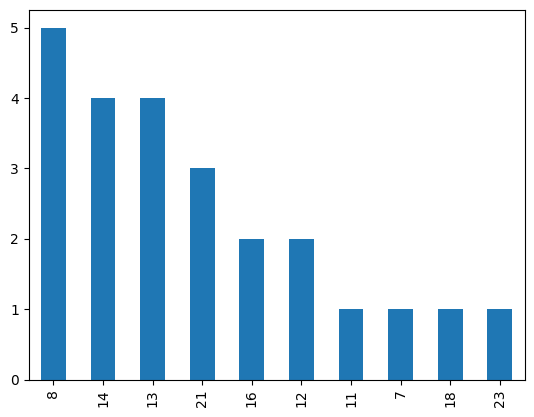

In [98]:
short_imerisia_df['hour'].value_counts().plot(kind='bar')

In [99]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [100]:
short_imerisia_df[short_imerisia_df['day']==30]['text'] 

12    .Το πιθανότερο είναι η ΕΚΤ να αυξήσει τα επιτό...
13    .Τα στοιχεία από την εκτέλεση του προϋπολογισμ...
14    .Οι ληξιπρόθεσμες οφειλές προς τα νοσοκομεία α...
Name: text, dtype: object

In [101]:
text = short_imerisia_df[short_imerisia_df['day']==30]['text'].str.cat(sep = ' ')

In [102]:
text

'.Το πιθανότερο είναι η ΕΚΤ να αυξήσει τα επιτόκια 25 μονάδες βάσης, ενώ υπάρχει και ενδεχόμενο να... .Τα στοιχεία από την εκτέλεση του προϋπολογισμού το πρώτο τρίμηνο του έτους δημιουργούν σοβαρές... .Οι ληξιπρόθεσμες οφειλές προς τα νοσοκομεία ανέρχονται σε πάνω από 1 δισ. ευρώ και αντί να...'

In [103]:
list(STOPWORDS)[0:20] 

["i'll",
 'being',
 'k',
 'have',
 'over',
 'like',
 "she'd",
 "you've",
 'as',
 "shan't",
 'am',
 "let's",
 "isn't",
 'their',
 "we're",
 'did',
 'http',
 'yourself',
 'be',
 'yourselves']

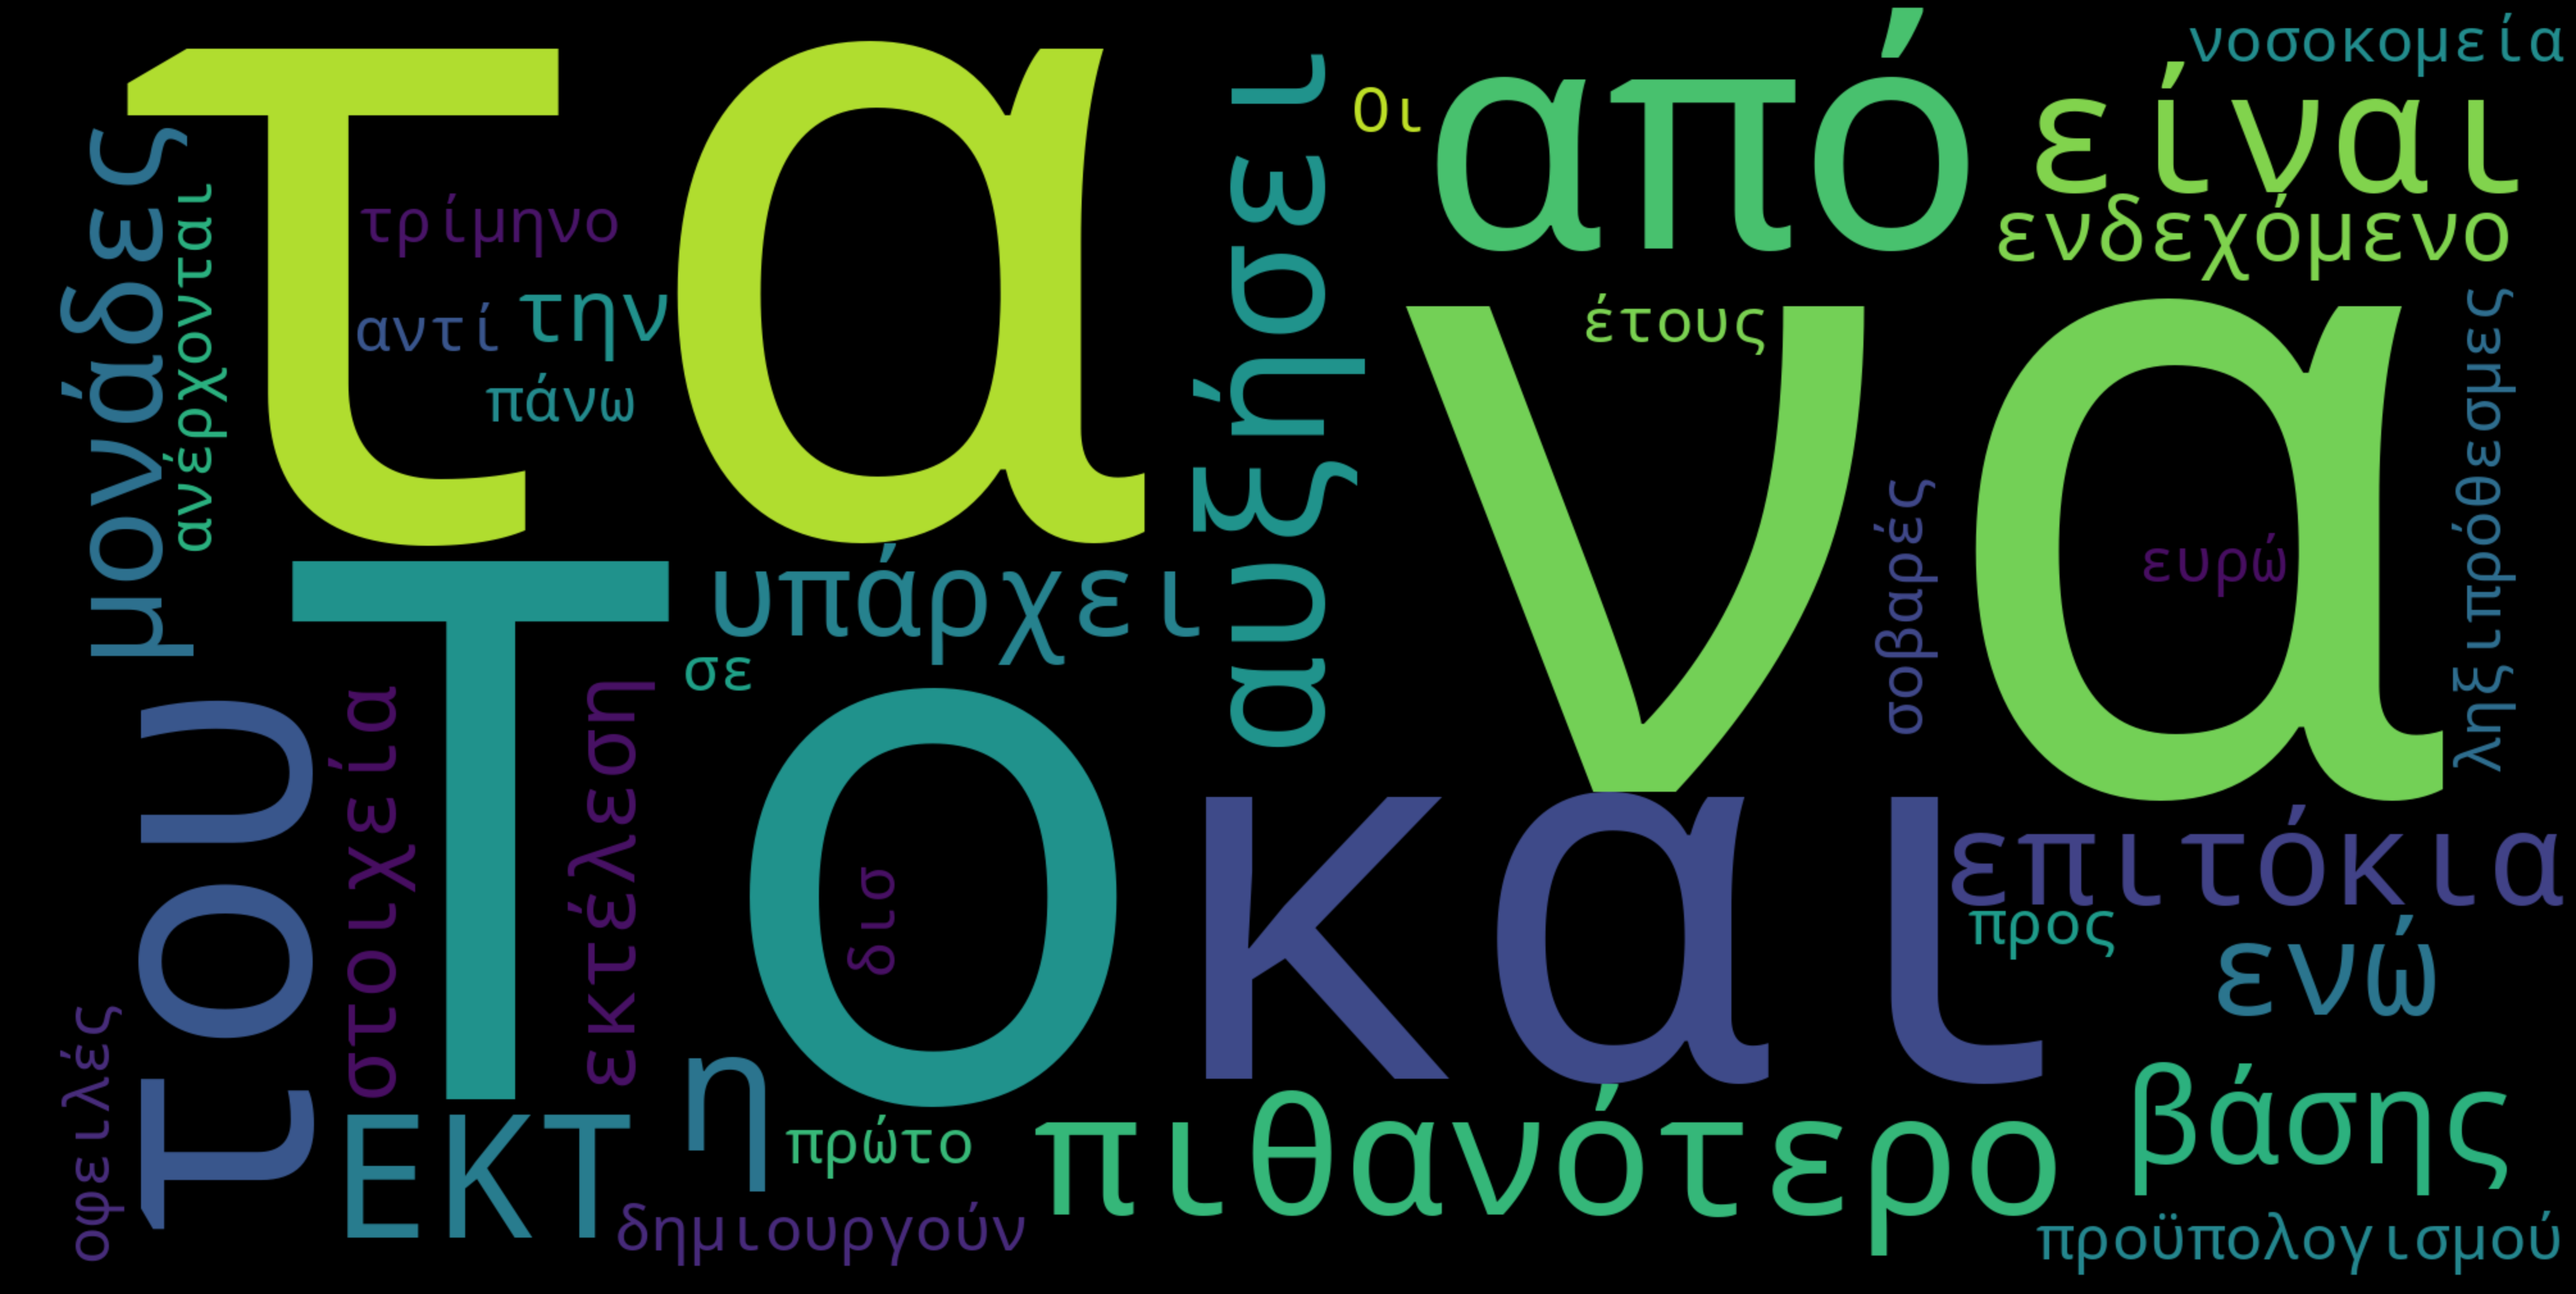

In [104]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(text) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k', 
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [105]:
import spacy

In [110]:
#!python -m spacy download el_core_news_sm

2023-05-30 15:00:07.518672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [111]:
nlp = spacy.load ('el_core_news_sm') 

In [112]:
list(nlp.Defaults.stop_words)[0:20]

['ορισμένα',
 'εκτός',
 'υπέρ',
 'εμείς',
 'όσο',
 'λόγω',
 'τόσος',
 'ταύτου',
 'πλάι',
 'οποίες',
 'άλλες',
 'ποιά',
 'αυτόν',
 'είμαστε',
 'αλλιώτικα',
 'στους',
 'έχουμε',
 'μεμιάς',
 'όλην',
 'λιγότερο']

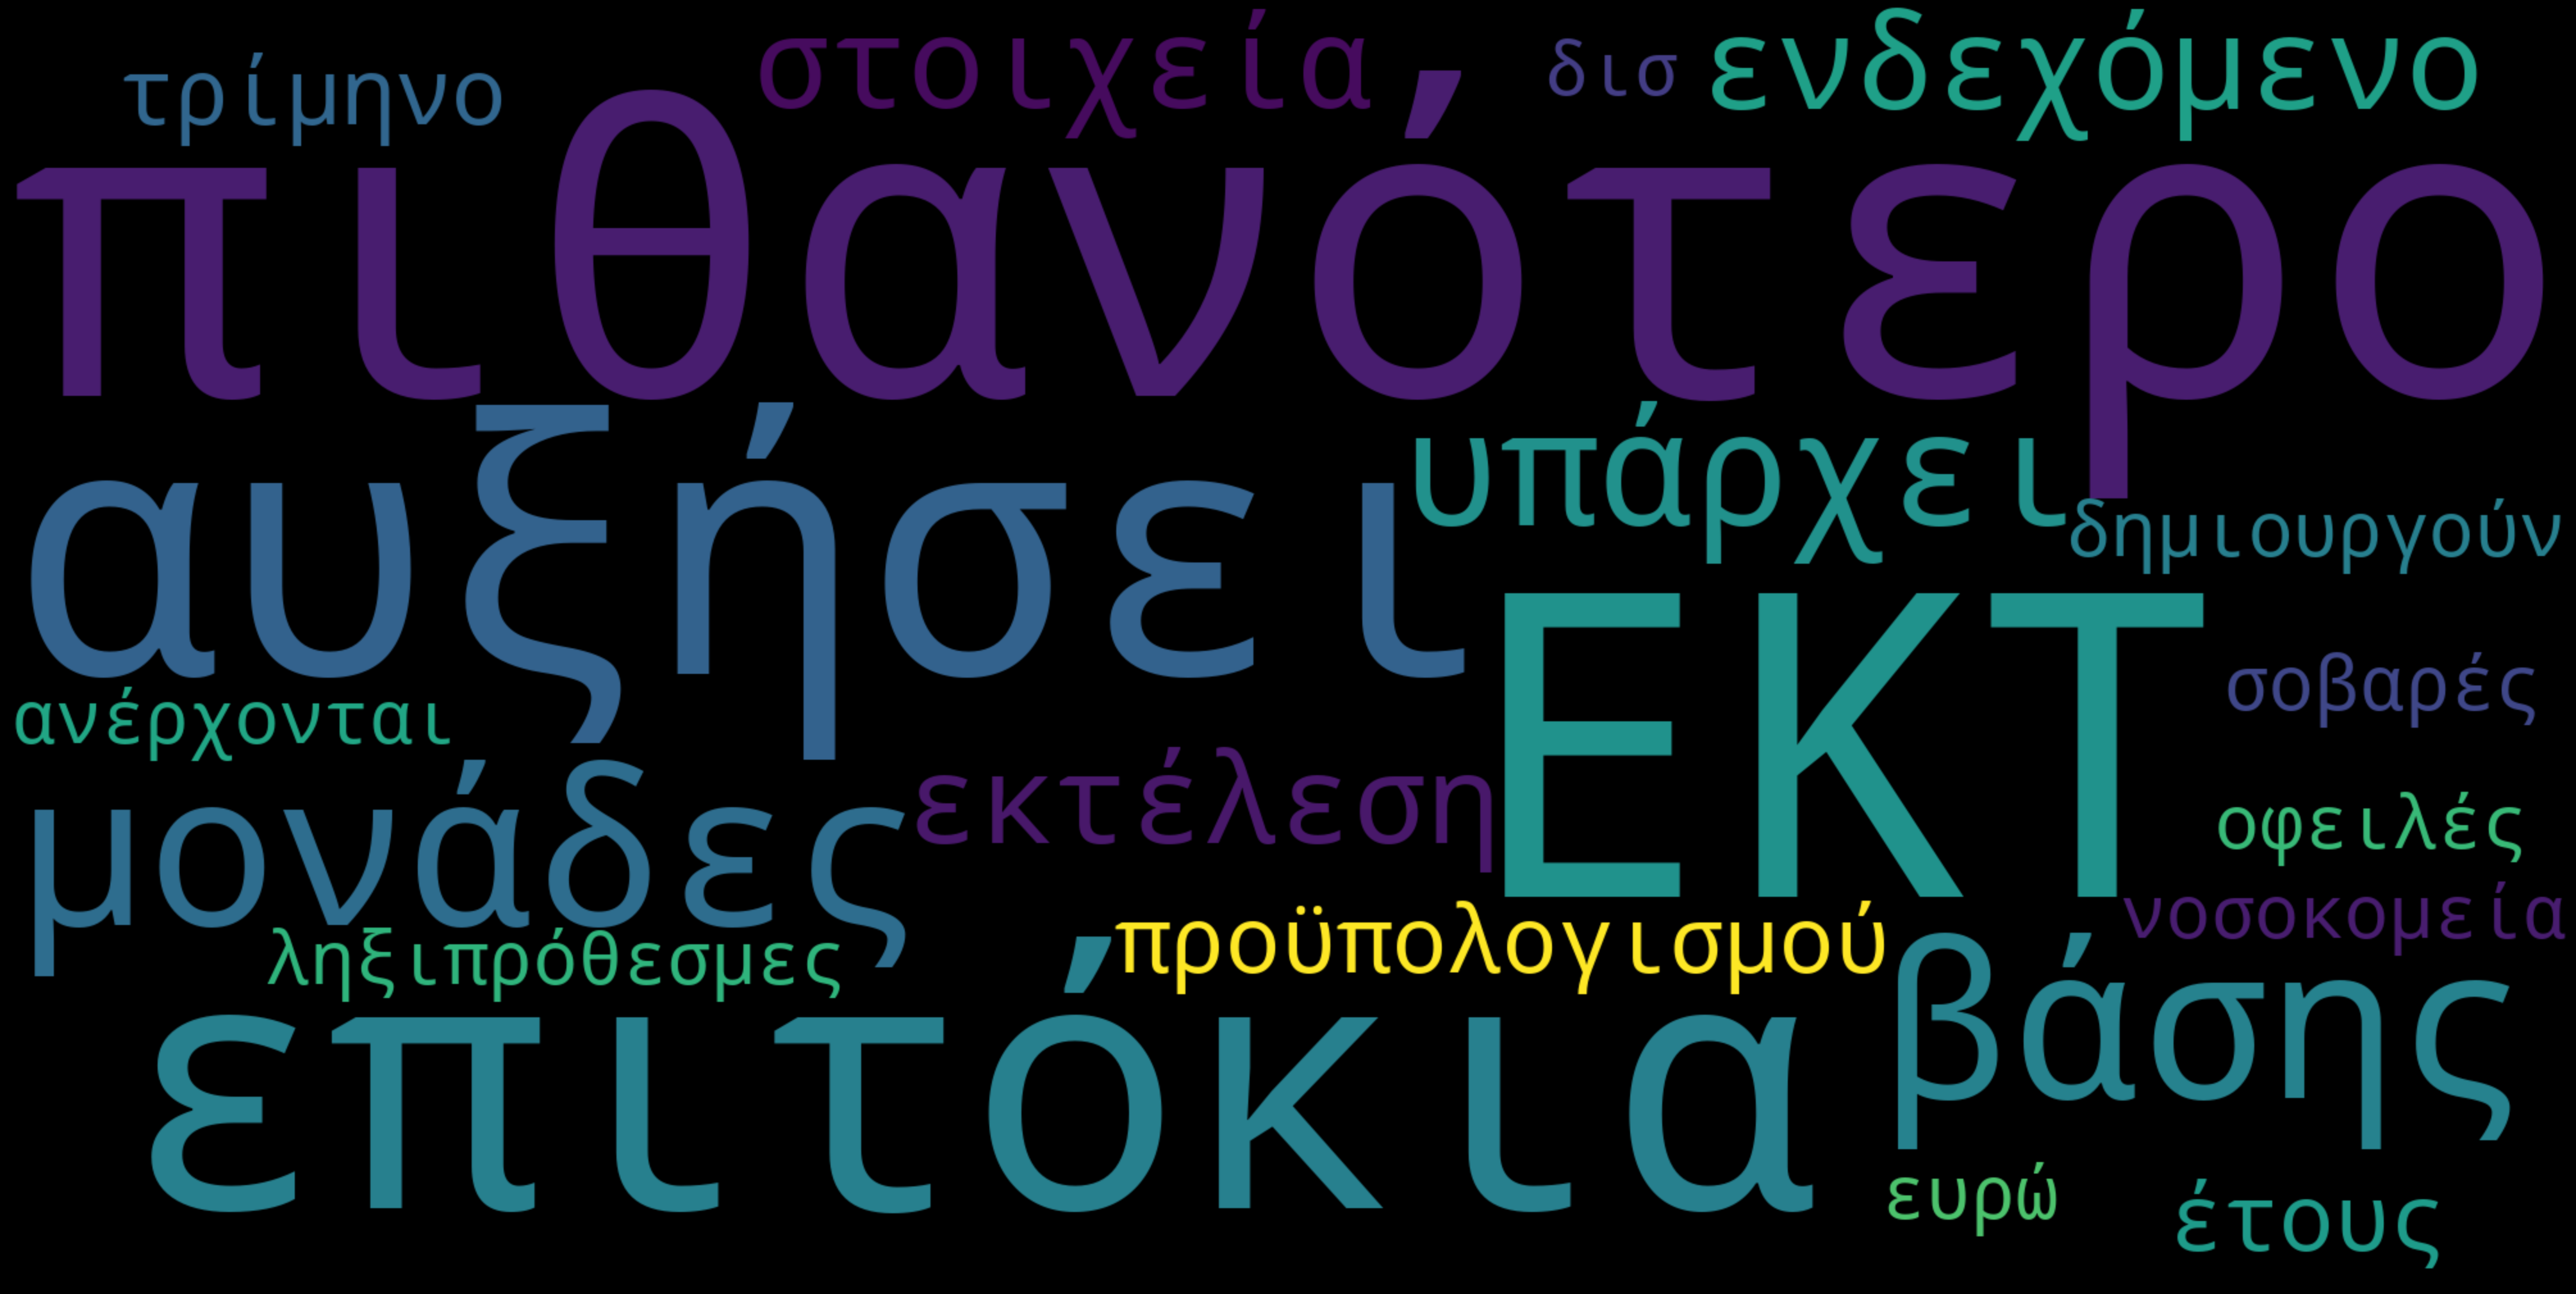

In [113]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()